In [6]:
import tensorflow as tf
%load_ext autoreload
%autoreload
from Scripts import get_data
from Scripts import NeuralNetwork
from Scripts import plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using SKlearn:

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = get_data.load_dataset(flatten=True)

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [9]:
clf = make_pipeline(LogisticRegression(random_state=42, verbose=1, n_jobs=-1)).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


In [10]:
y_pred_test = clf.predict(X_test)

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test, average='macro'))
print("F2-score:", fbeta_score(y_test, y_pred_test, average='macro', beta=2))
print("F0.5-score:", fbeta_score(y_test, y_pred_test, average='macro', beta=0.5))

Accuracy: 0.9257
F1-score: 0.9246297214344377
F2-score: 0.9246132597406673
F0.5-score: 0.9246902760402305


In [12]:
ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))

OneHotEncoder()

In [13]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()

In [14]:
y_pred_ohe = ohe.transform(y_pred_test.reshape(-1, 1)).toarray()

In [15]:
conf_matrix = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe, y_pred_ohe)

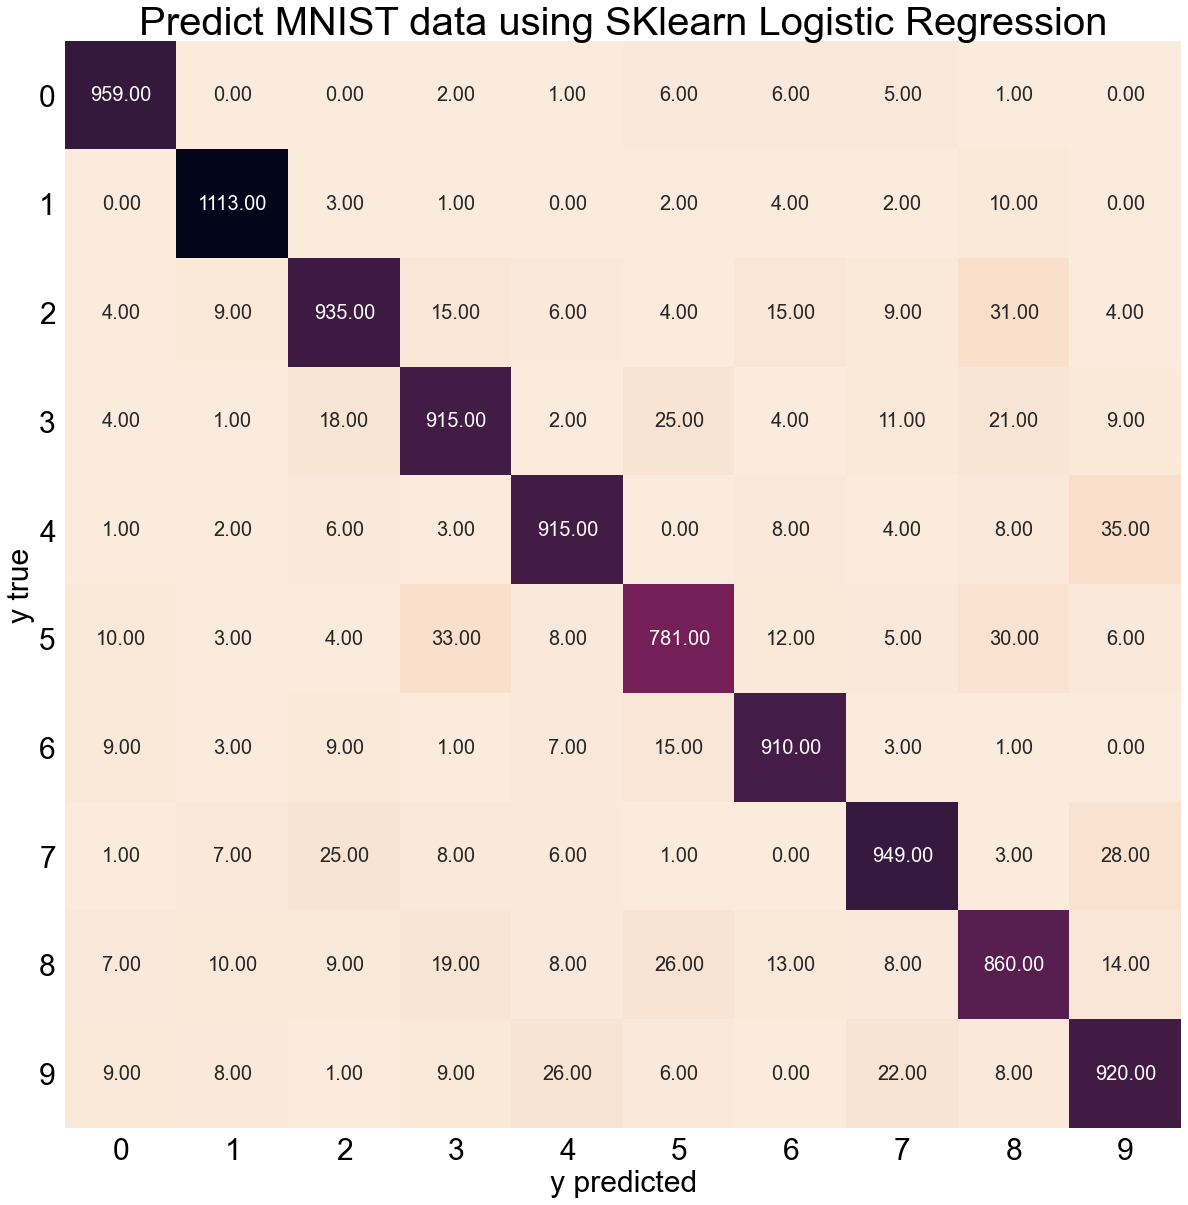

In [16]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using SKlearn Logistic Regression", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/MNIST_confMatrix_sklearn_logreg.png",dpi=100)
plt.show()

In [17]:
def shuffle_batch_generator(batch_size, X, y):
    # data_range, X_shape, y_shape
    X_len = X.shape[0]
    features = X.shape[1]
    try:
        y_labels = y.shape[1]
    except:
        y_labels = 1

    data_range_array = np.arange(X_len)
    np.random.shuffle(data_range_array)
    batch_features = np.zeros((batch_size,features))
    batch_labels = np.zeros((batch_size,y_labels)) 
    gen_x = generate_y_shuffle(X, data_range_array)
    gen_y = generate_X_shuffle(y, data_range_array)
    
    while True:
        for i in range(batch_size):
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels

def generate_y_shuffle(y,range_array):
    while True:
        for i in range_array:
            y_batch = y[i]
        yield y_batch


def generate_X_shuffle(X,range_array):
    while True:
        for i in range_array:
            X_batch = X[i]
        yield X_batch


In [21]:
clf = SGDClassifier(loss = 'log', random_state = 42, verbose=0, max_iter=100,learning_rate='adaptive', eta0=0.001,n_iter_no_change=5)
batchSize = 512
epochs = 5

for h in range(epochs):
    batch_gen = shuffle_batch_generator(batchSize,X_train,y_train)
    for i in range(int(X_train.shape[0]/batchSize)):
        X_batch,y_batch = next(batch_gen)
        clf.partial_fit(X_batch,y_batch.ravel(),np.unique(y_train))
        y_val_pred = clf.predict(X_val)
        print(accuracy_score(y_val,y_val_pred))

0.0915
0.0915
0.0915
0.0915
0.0915
0.0915
0.0915
0.0915
0.0915
0.0915
0.0915


KeyboardInterrupt: 

In [ ]:
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))

# Using own algorithm: